In [9]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

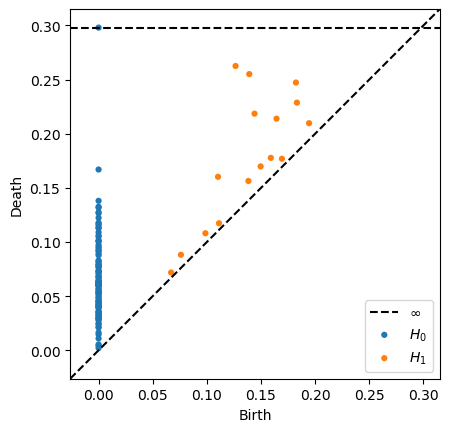

In [10]:
data = np.random.random((100,2))
dgms = ripser(data)['dgms']
plot_diagrams(dgms, show=True)

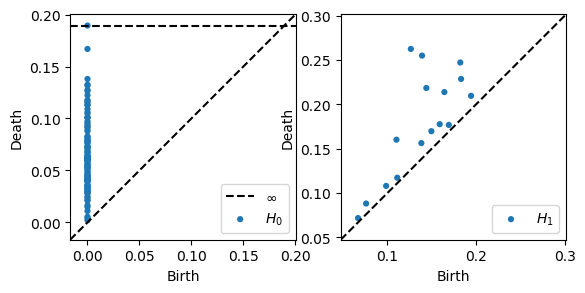

In [11]:
# Plot each diagram by itself
plot_diagrams(dgms, plot_only=[0], ax=plt.subplot(121))
plot_diagrams(dgms, plot_only=[1], ax=plt.subplot(122))